In [19]:
%matplotlib inline

import pandas as pd
import glob
import matplotlib.pyplot as plt
import os
import itertools

In [20]:
filename = "1582810461"

df = pd.read_csv("results/" + filename + ".csv", index_col=None, header=0)
df.head()

,p1_depth,p1_time_limit,p1_eval,p2_depth,p2_time_limit,p2_eval,game_id,r1_mu,r1_sigma,r2_mu,r2_sigma
0,3,None,Dijkstra,None,0.1,Dijkstra,1,20.604168,7.171476,29.395832,7.171476
1,3,None,Dijkstra,None,1.0,Dijkstra,1,20.604168,7.171476,29.395832,7.171476
2,None,0.1,Dijkstra,None,1.0,Dijkstra,1,20.604168,7.171476,29.395832,7.171476
3,3,None,Dijkstra,None,0.1,Dijkstra,2,23.886356,5.677503,26.113644,5.677503
4,None,0.1,Dijkstra,None,1.0,Dijkstra,2,18.770371,6.523414,31.229629,6.523414


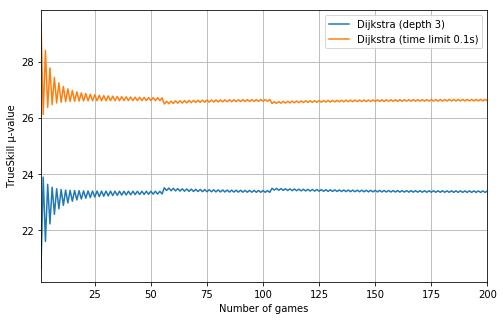

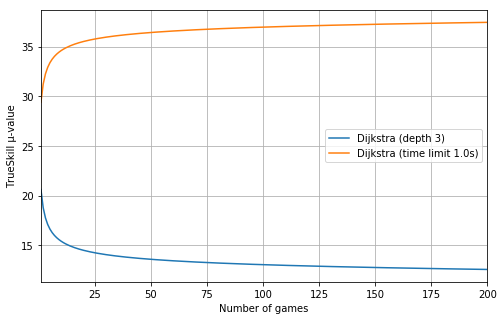

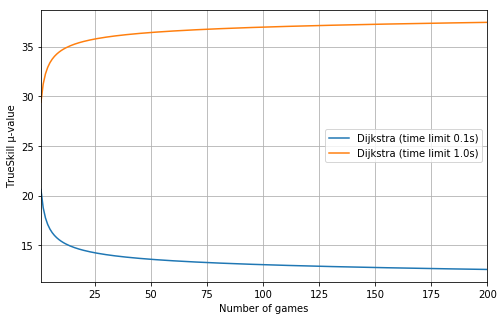

In [44]:
players = [
    { 'depth': 3, 'time_limit': None, 'eval': 'Dijkstra' },
    { 'depth': None, 'time_limit': 0.1, 'eval': 'Dijkstra' },
    { 'depth': None, 'time_limit': 1.0, 'eval': 'Dijkstra' },
]

if not os.path.exists('plots'): os.makedirs('plots')


player_permutations = []
for i in range(len(players)):
    for j in range(i + 1, len(players)):
        player_permutations.append((players[i], players[j]))

for i, (p1, p2) in enumerate(player_permutations):
    games = df[(df['p1_depth'] == str(p1['depth'])) & (df['p1_time_limit'].astype(str) == str(p1['time_limit'])) & (df['p1_eval'] == p1['eval'])
               & (df['p2_depth'] == str(p2['depth'])) & (df['p2_time_limit'].astype(str) == str(p2['time_limit'])) & (df['p2_eval'] == p2['eval'])]    
    ax = games.plot(x='game_id', y=['r1_mu', 'r2_mu'], figsize=(8,5), grid=True)
    
    ax.set_xlabel("Number of games")
    ax.set_ylabel("TrueSkill μ-value")
    
    p1_name = p1['eval'] + (" (depth " + str(p1['depth']) + ")" if p1['depth'] is not None else " (time limit " + str(p1['time_limit']) + "s)")
    p2_name = p2['eval'] + (" (depth " + str(p2['depth']) + ")" if p2['depth'] is not None else " (time limit " + str(p2['time_limit']) + "s)")
    ax.legend([p1_name, p2_name]);
    
    ax.get_figure().savefig('plots/' + filename + '_' + str(i) + '.png')